In [1]:
from ovito.io import import_file
import numpy as np
import matplotlib.pyplot as plt


/home/ata/miniconda3/lib/python3.10/site-packages/ovito/_extensions/anari.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


In [58]:
pipeline = import_file("nose_neutral/neut_sims/Harmonic/cluster/neutral_npt_ani_v1_10_1_10_0_e0.3.dump", columns =
         ["Atoms","Particle Type", "Position.X", "Position.Y", "Position.Z"])

In [59]:
print(pipeline.source.num_frames)

1361


In [60]:
data = []
for frame in range(pipeline.source.num_frames):
    data.append(pipeline.compute(frame))

In [61]:
positions=[]
j=0
for i in data:
    positions.append([data[j].particles["Particle Type"],data[j].particles["Position"]])
    j=j+1


In [62]:
print(positions[0][1][...])

[[-12.1147   -40.1118     0.455772]
 [-26.011    -35.7671    -3.59049 ]
 [-25.9261   -36.1238    -3.71724 ]
 ...
 [ 13.4461    41.9986    14.9766  ]
 [ 16.8401    41.919     15.6904  ]
 [ 16.8142    41.9986    14.9766  ]]


In [63]:
position_array=[]
j=0
for iter in positions:
    position_array.append([positions[j][0][...],positions[j][1][...]])
    j=j+1


In [64]:
wholedata=[]
for i in range(len(positions)):
    a=np.array(position_array[i][0])
    b=np.array(position_array[i][1])
    a=np.transpose(a)
    b=np.transpose(b)
    a=[a]
    c=np.concatenate((a,b),axis=0)
    c=np.transpose(c)
    wholedata.append(c)


In [65]:
print(wholedata[0])
print(len(wholedata[0]))

print(wholedata[0][1,:])
    

[[  2.       -12.1147   -40.1118     0.455772]
 [  2.       -26.011    -35.7671    -3.59049 ]
 [  5.       -25.9261   -36.1238    -3.71724 ]
 ...
 [  4.        13.4461    41.9986    14.9766  ]
 [  1.        16.8401    41.919     15.6904  ]
 [  4.        16.8142    41.9986    14.9766  ]]
22500
[  2.      -26.011   -35.7671   -3.59049]


In [122]:
ion_list=[]
for i in range(len(wholedata)):
    for j in range(len(wholedata[0])):
        if wholedata[i][j,0]==3 and i>500 and wholedata[i][j,3]>15 and wholedata[i][j,3]:
            ion_list.append(wholedata[i][j,:])

In [123]:
ion_array=np.array(ion_list)

In [124]:
x_vals = ion_array[:,1]
y_vals = ion_array[:,2]
z_vals = ion_array[:,3]
tot_vals = [x_vals,y_vals,z_vals]

(-30.0, 30.0)

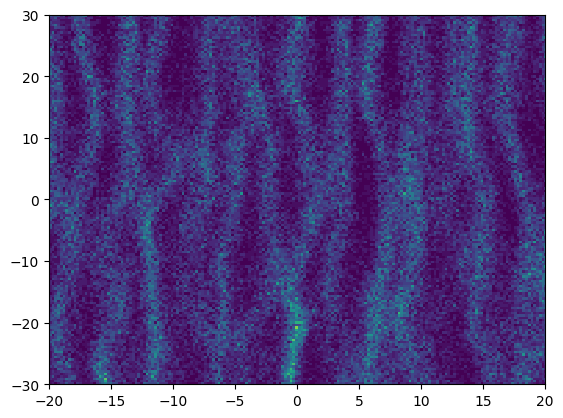

In [125]:

plt.hist2d(y_vals,x_vals,bins=400)
plt.xlim(-20,20)
plt.ylim(-30,30)